In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    tables = pd.read_html(html.replace(',', '.'), header=0, flavor='bs4')

    table_index = 9
    selected_table = tables[table_index]
else:
    print(response.status_code)

In [3]:
selected_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
selected_table.shape

(28, 9)

In [5]:
selected_table.replace("—", float("nan"), inplace=True)

In [6]:
selected_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [7]:
selected_table.apply(pd.to_numeric, errors='ignore')

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [8]:
selected_table.isnull().mean() * 100

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [9]:
selected_table.drop(selected_table.tail(1).index, inplace=True)

In [10]:
non_numeric_columns = selected_table.columns[selected_table.columns != 'Регіон'][selected_table.dtypes[selected_table.columns != 'Регіон'] == object]
selected_table[non_numeric_columns] = selected_table[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

In [11]:
above_average_2019 = selected_table[selected_table['2019'] > selected_table['2019'].mean()]['Регіон']
above_average_2019.tolist()

['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

In [12]:
selected_table.loc[selected_table['2014'].idxmax(), 'Регіон']

'Рівненська'

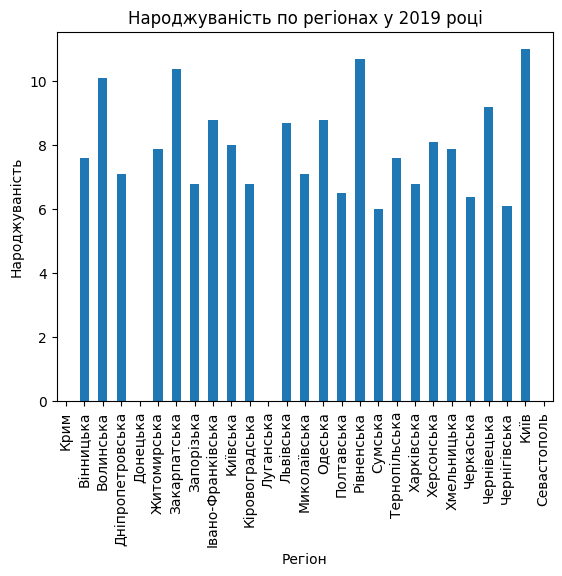

In [13]:
import matplotlib.pyplot as plt

selected_table.plot(x='Регіон', y='2019', kind='bar', legend=False)
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.show()

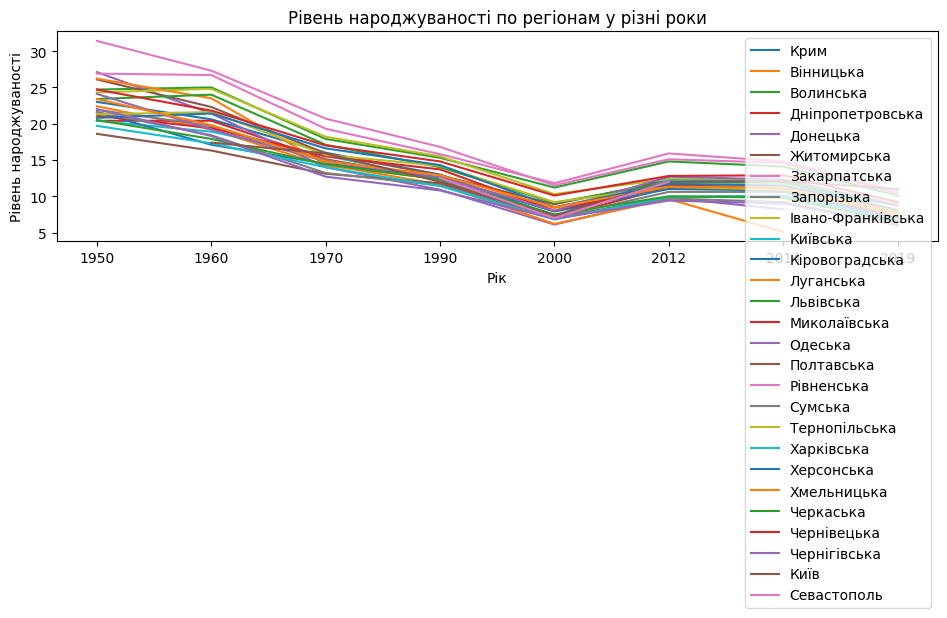

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(2, 2, 2)
for region in selected_table['Регіон']:
    plt.plot(selected_table.columns[1:], selected_table[selected_table['Регіон'] == region].iloc[0, 1:], label=region)
plt.title('Рівень народжуваності по регіонам у різні роки')
plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.legend()

Text(0, 0.5, 'Кількість регіонів')

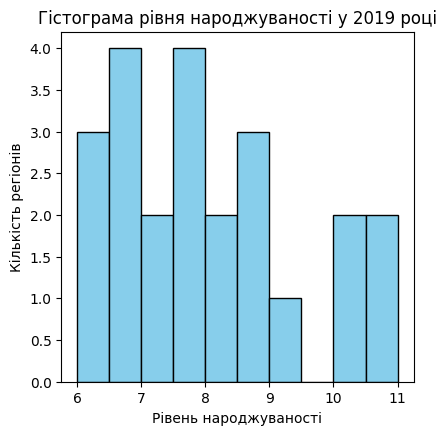

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.hist(selected_table['2019'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Гістограма рівня народжуваності у 2019 році')
plt.xlabel('Рівень народжуваності')
plt.ylabel('Кількість регіонів')